# NetworkX Tutorial Chapter 1

In [1]:
import networkx as nx
import matplotlib
%matplotlib inline

In [2]:
nx.__version__

'3.6.1'

# Creating and Drawing Undirected Graphs

An undirected network graph is a collection of points (nodes) connected by lines (edges) where the relationship between them is mutual or bidirectional. Where as a directed graph will use arrows to show a sprecific flow between nodes. 

* Nodes are the points and might represent an entity, i.e. people. 
* Edges are the lines connecting the nodes and in undirected networks are both ways.

If an edge exists between $u$ and $v$, it is represented as an unordered pair $\{u, v\}$. This means the path from $u$ to $v$ is identical to the path from $v$ to $u$.

An example of a mutual edge and therefore an undirected graph is friends on facebook. Twitter would be an example of a directed graph where connected do not have to be mutual and can be one way. 

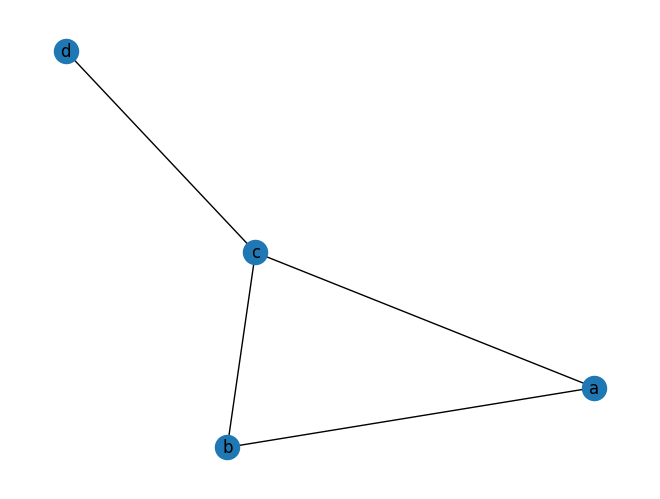

In [3]:
G = nx.Graph()

# Ways to add nodes 
G.add_node('a')
nodes_to_add = ['b', 'c', 'd']
G.add_nodes_from(nodes_to_add)

# Ways to add edges, need to be pairs
G.add_edge('a', 'b')
edges_to_add = [('a', 'c'), ('b', 'c'), ('c', 'd')]
G.add_edges_from(edges_to_add)

# Plotting the graph
nx.draw(G, with_labels=True)


**Do edges need to be specified as pairs?:**

In NetworkX, an undirected graph, an edge must represent a connection between exactly two points. An edge is defined as a relationship between two entities, the library expects a tuple (a pair) to define where that connection starts and ends. 

For more complicated, or nuaunced, applications in NetworkX there may be some work arounds and shortcuts. But as a default/theory, an edge is a pairwise relationship.

**Naming Conventions in NetworkX**:

In standard pythons, variables as named in `snake_case`, i.e. lower case with underscores. Classes are named in `CamelCase`, i.e. with the first letter of each word capitalized. 

NetworkX doesn't follow this, generally a single capital letter is used for the names of graphs, i.e. `G`. This convention comes form the world of dsicrete mathematics.

# Customizing an Initalized Graph

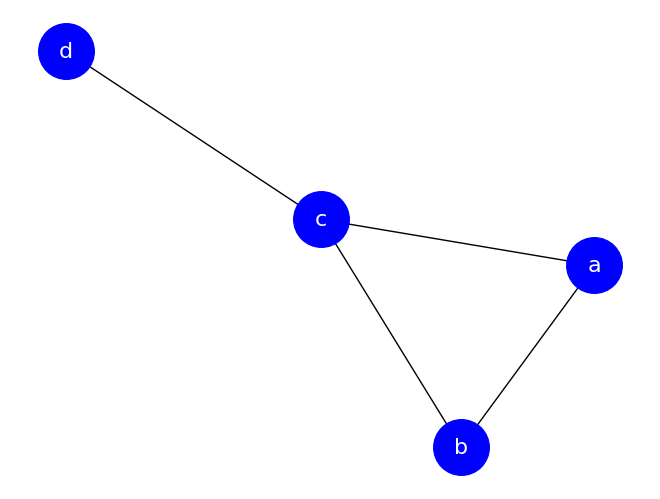

In [4]:
nx.draw(G,
        with_labels=True,
        node_color='blue',
        node_size=1600,
        font_color='white',
        font_size=16,
        )

# Graph Methods

In [5]:
G.nodes() #'list` all nodes (returns an object)

NodeView(('a', 'b', 'c', 'd'))

In [6]:
G.edges() #'list' all edges

EdgeView([('a', 'b'), ('a', 'c'), ('b', 'c'), ('c', 'd')])

The returned objects are iterators so can be looped through

In [7]:
for node in G.nodes:
    print(node)

a
b
c
d


In [8]:
for edge in G.edges:
    print(edge)

('a', 'b')
('a', 'c')
('b', 'c')
('c', 'd')


The objects have built-in counting methods

In [9]:
print(G.number_of_nodes())
print(G.number_of_edges())

4
4


Some of the graph methods can take arguements, i.e. a node or edge. Often times, the return of methods is an iterator instead of a data structure such as a list. However, they can be accessed just the same or just converted to a list:

In [10]:
G.neighbors('b')

In [11]:
for neighbor in G.neighbors('b'):
    print(neighbor)

a
c


In [12]:
list(G.neighbors('b'))

['a', 'c']

# NetworkX Functions vs Graph Methods

A lot of the most popular NetworkX functions are provides as methods as explored above: 

`G.<method_name>(<arguments>)`. 

However, there are many more which are just module functions and called via:

`nx.<function_name>(G, <arguments>)`. 

Often the functions take an initalised graph as an agrument. 

In [14]:
nx.is_tree(G)

False

In [15]:
nx.is_connected(G)

True

A graph is connected if there is a path between every single pair of nodes. You can get from any Node A to any Node B, no matter how many steps it takes. Connected graphs often have multiple ways to get to the same place. If you remove one edge, the graph might still stay connected.

A tree is a special type of connected graph that is minimally connected. To be a tree, a graph must satisfy two conditions:
* It must be connected.
* It must have no cycles (no loops).

There is exactly one path between any two nodes. If you remove any edge from a tree, it becomes disconnected. It has no "backup" routes. For a tree with $n$ nodes, it will always have exactly $n-1$ edges.

# Node and Edge Existence

Check if a note is present in the graph:

In [16]:
G.has_node('a')

True

In [17]:
'd' in G.nodes

True

We can also check if two nodes are directly connected:

In [18]:
G.has_edge('a', 'b')

True

In [19]:
('c', 'd') in G.edges

True

# Node Degree

One of the most important questions we can ask about a node in a graph is how many other nodes it connects to. Using the `.neighbors()` method from above, we could formulate this question as so:

In [21]:
len(list(G.neighbors('a')))

2

But NetworkX has a graph method to acheive this:

In [22]:
G.degree('a')

2